In [5]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [2]:
df = pd.read_csv('data/train.csv', header=None)
df_label = pd.read_csv('data/trainLabels.csv', header=None)
print(df.shape)
print(df_label.shape)

(1000, 40)
(1000, 1)


<AxesSubplot:>

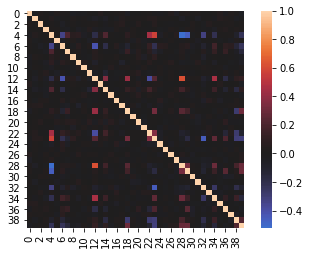

In [7]:
corr_df = df.corr()
sns.heatmap(corr_df, square=True, center=0)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df, df_label, test_size=0.25, random_state=42)
# y_train = y_train.values
# y_test = y_test.values

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=150, oob_score=True).fit(x_train, y_train)

<ipython-input-39-59d07fc0c53b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier(n_estimators=100, max_depth=150, oob_score=True).fit(x_train, y_train)


In [40]:
print(rf_model.feature_importances_)
print(rf_model.oob_score_)

[0.01167939 0.0151239  0.01213473 0.01225101 0.03811711 0.01256222
 0.04318815 0.01760266 0.01163692 0.0122484  0.01334321 0.01335828
 0.10965914 0.0128212  0.12992331 0.01309688 0.01066828 0.00980218
 0.05002412 0.01140869 0.01321412 0.01153177 0.02145936 0.02478289
 0.01099902 0.01398176 0.01418816 0.01369094 0.03350278 0.03544351
 0.01193979 0.01133351 0.03071014 0.01112093 0.04188915 0.00928598
 0.05018022 0.01445947 0.01856124 0.0470755 ]
0.8466666666666667


In [68]:
train_pred = rf_model.predict(x_train)
metrics.accuracy_score(y_train, train_pred)

1.0

In [46]:
test_pred = rf_model.predict(x_test)
metrics.accuracy_score(y_test, test_pred)

0.872

In [48]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf.coef_

C:\Users\mia\anaconda3\envs\mypy\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[-0.03033147, -0.10270887, -0.11530471,  0.08406161,  0.14299378,
         0.00609186, -0.03802966, -0.0121494 ,  0.02520737,  0.16109526,
        -0.13345476, -0.04504452,  0.26148983, -0.02357645,  0.42135164,
        -0.24446131,  0.02468915, -0.03838466,  0.08549467,  0.05161092,
        -0.13548774, -0.1378781 ,  0.11014362, -0.08399143,  0.00534757,
        -0.08728469,  0.16807727, -0.13245823, -0.07688609, -0.07376478,
        -0.160437  ,  0.00910916, -0.14103647, -0.22637487,  0.28860212,
         0.09294434, -0.19276076,  0.19985711, -0.09878025,  0.37471067]])

In [49]:
train_pred = clf.predict(x_train)
metrics.accuracy_score(y_train, train_pred)

0.84

In [50]:
test_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, test_pred)

0.816

In [51]:
df_test = pd.read_csv('data/test.csv', header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [66]:
test_pred = clf.predict(df_test)
test_df = pd.DataFrame(test_pred, columns=['Solution'])
test_df['id'] = range(1, len(test_df)+1)
test_df = test_df[['id', 'Solution']]
test_df.to_csv('submission.csv', index=False)

In [69]:
test_pred = rf_model.predict(df_test)
test_df = pd.DataFrame(test_pred, columns=['Solution'])
test_df['id'] = range(1, len(test_df)+1)
test_df = test_df[['id', 'Solution']]
test_df.to_csv('submission.csv', index=False)